# Lab 3 Titanic Data Set - Predicting Categorical Target and Evaluating Performance

Author: Craig Wilcox

Date: 3/27/2025

Introduction: This lab will run test cases to predict survivability using learning models. Beyond testing we will also evaluate using metrics and create visualizations to interpret the results.

## Section 1 - Imports

In [4]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

## Section 2 - Data Exploration and Preperation

In [7]:
# Input missing values for age using the median
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

# Fill in missing values
titanic['embark_town'] = titanic['embark_town'].fillna(titanic['embark_town'].mode()[0])

# Create new features
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})
titanic['alone'] = titanic['alone'].astype(int)

## Section 3 - Feature Selection and Justification

In [6]:
# Case 1: alone only 
X1 = titanic[['alone']]
y1 = titanic['survived']

# Case 2: age only
X2 = titanic[['age']]
y2 = titanic['survived']

# Case 3: age + family_size
X3 = titanic[['age', 'family_size']]
y3 = titanic['survived']

### Reflection
 
Why are these features selected? These features can both be related to each other and have impact on survivability.
Are there features that are likely to be highly predictive of survival? I think they will be moderately predictive.

## Section 4 - Split Data, Create and Train Model, Predict and Evaluate Model Performance, REport Confusion Matrix, Report Decision Tree Plot

## Case 1

In [ ]:
# Split Data

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X1, y1):
    X1_train = X1.iloc[train_indices]
    X1_test = X1.iloc[test_indices]
    y1_train = y1.iloc[train_indices]
    y1_test = y1.iloc[test_indices]

print('Train size: ', len(X1_train), 'Test size: ', len(X1_test))

Train size:  712 Test size:  179


## 

In [ ]:
# Create and Train Decision Tree
 
tree_model = DecisionTreeClassifier()
tree_model.fit(X1_train, y1_train)

DecisionTreeClassifier()

In [ ]:
# Predict and evaluate training data (X train)

y1_pred = tree_model.predict(X1_train)  
print("Results for Decision Tree on training data:")  
print(classification_report(y1_train, y1_pred))  

Results for Decision Tree on training data:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       439
           1       0.50      0.51      0.51       273

    accuracy                           0.62       712
   macro avg       0.60      0.60      0.60       712
weighted avg       0.62      0.62      0.62       712



In [11]:
# Predict and evaluate test data

y1_test_pred = tree_model.predict(X1_test)
print("Results for Decision Tree on test data:")
print(classification_report(y1_test, y1_test_pred))

Results for Decision Tree on test data:
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



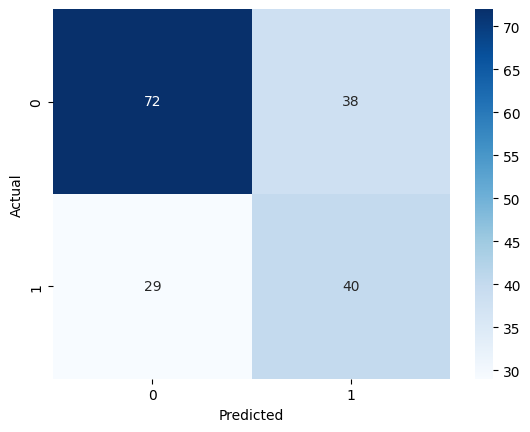

In [12]:
# Report Confusion Matrix

cm = confusion_matrix(y1_test, y1_test_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()  

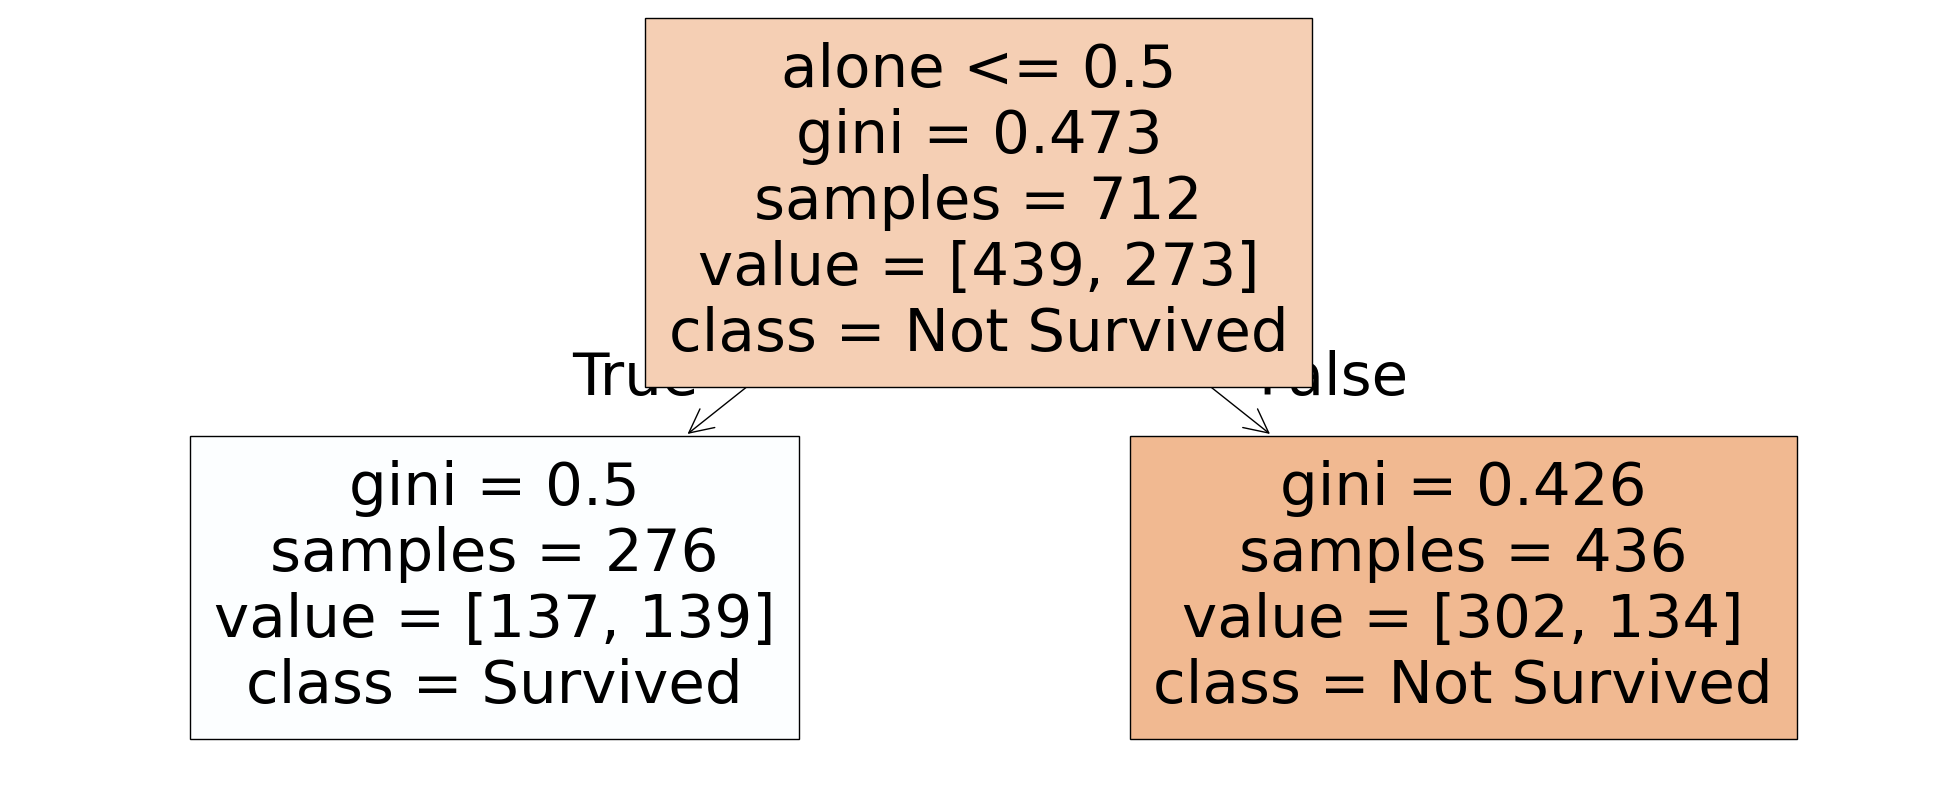

In [14]:
# Report Decision Tree Plot

fig = plt.figure(figsize=(25,10))
plot_tree(tree_model, feature_names=X1.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()
fig.savefig("decision_tree_titanic_case_1.png")

## Case 2

In [15]:
# Split Data

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X2, y2):
    X2_train = X2.iloc[train_indices]
    X2_test = X2.iloc[test_indices]
    y2_train = y2.iloc[train_indices]
    y2_test = y2.iloc[test_indices]

print('Train size: ', len(X2_train), 'Test size: ', len(X2_test))

Train size:  712 Test size:  179


In [16]:
# Create and Train Decision Tree
 
tree_model = DecisionTreeClassifier()
tree_model.fit(X2_train, y2_train)

DecisionTreeClassifier()

In [17]:
# Predict and evaluate training data (X train)

y2_pred = tree_model.predict(X2_train)  
print("Results for Decision Tree on training data:")  
print(classification_report(y2_train, y2_pred))  

Results for Decision Tree on training data:
              precision    recall  f1-score   support

           0       0.68      0.92      0.78       439
           1       0.69      0.29      0.41       273

    accuracy                           0.68       712
   macro avg       0.68      0.61      0.60       712
weighted avg       0.68      0.68      0.64       712



In [18]:
# Predict and evaluate test data

y2_test_pred = tree_model.predict(X2_test)
print("Results for Decision Tree on test data:")
print(classification_report(y2_test, y2_test_pred))

Results for Decision Tree on test data:
              precision    recall  f1-score   support

           0       0.63      0.89      0.74       110
           1       0.50      0.17      0.26        69

    accuracy                           0.61       179
   macro avg       0.57      0.53      0.50       179
weighted avg       0.58      0.61      0.55       179



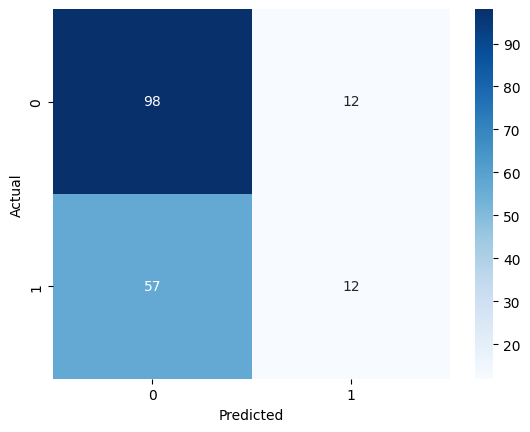

In [19]:
# Report Confusion Matrix

cm = confusion_matrix(y2_test, y2_test_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show() 

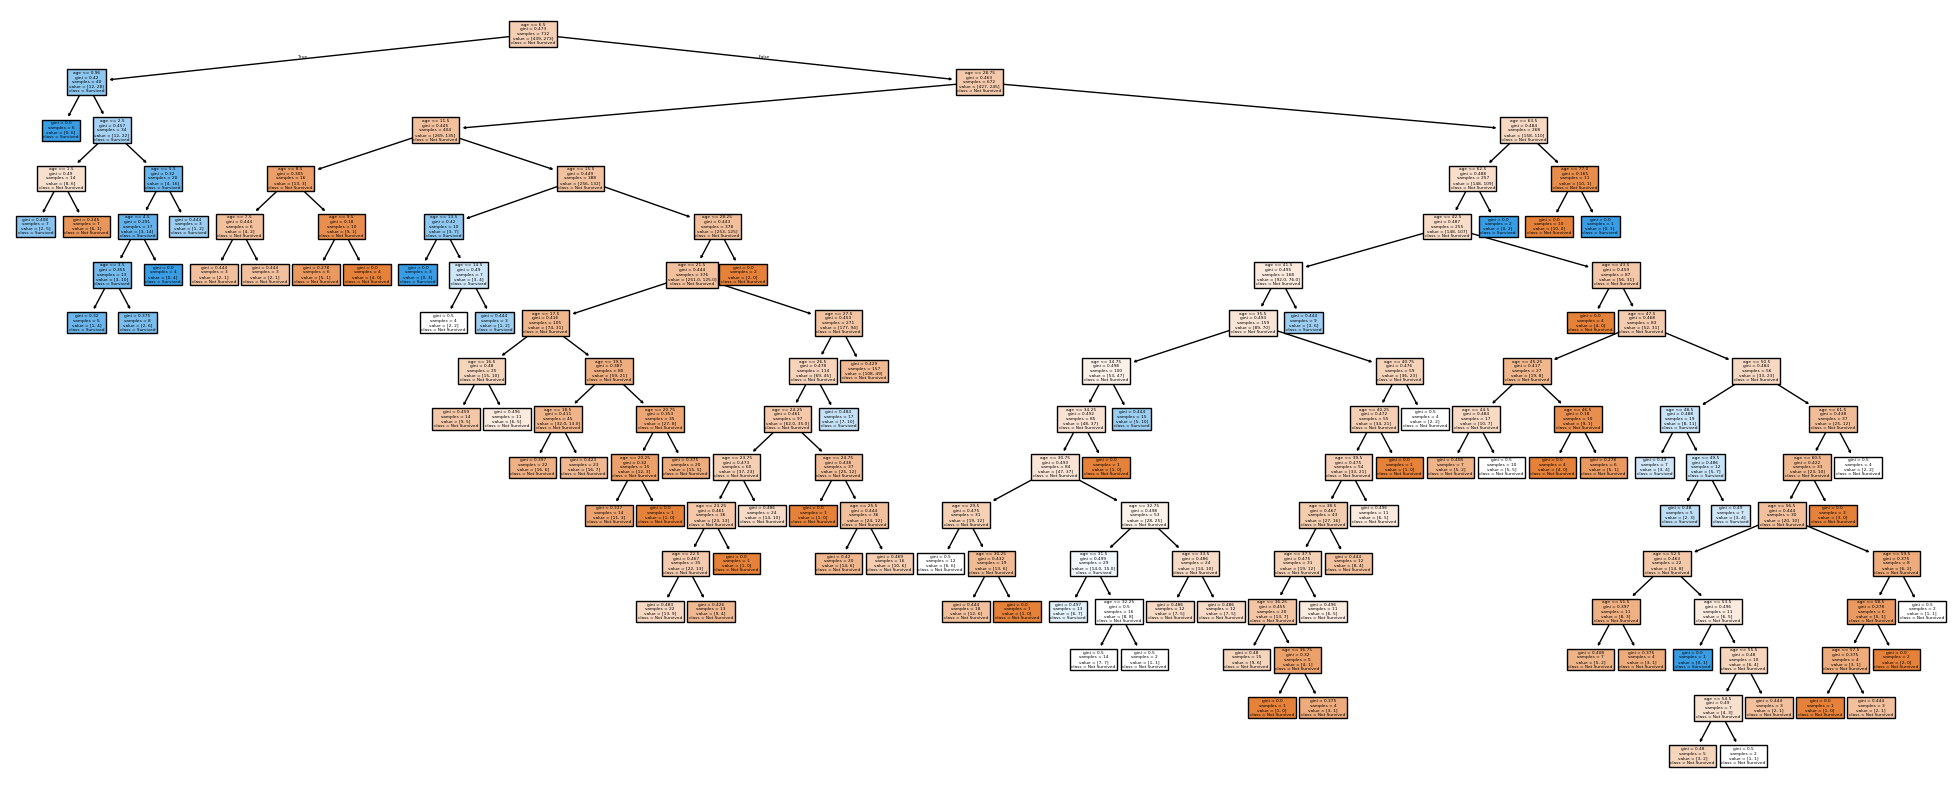

In [20]:
# Report Decision Tree Plot

fig = plt.figure(figsize=(25,10))
plot_tree(tree_model, feature_names=X2.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()
fig.savefig("decision_tree_titanic_case_2.png")